<a href="https://colab.research.google.com/github/vak1997/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [4]:
# mount the gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing the libraries**

In [5]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#import the data
sales_df=pd.read_csv("/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv")
stores_df=pd.read_csv("/content/drive/MyDrive/Data & Resources/store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Data Information**

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## **Inference:**



*   Sales data have **9 columns and 1017209 rows**
*   There are no null values in sales data

*   Our task is forecast the sales, so we need to convert data type of Date column to date time and arrange it in sorted order to predict the sales







## **Inference**


*   Store Data have 1115 rows and 10 columns
*   It has null values in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval columns. we need to drop or fill some values in the column depend on need of analysis



# **Data Cleaning and Preparation**

**Converting Date into date format and  Extracting the parts of date like year, month and day**

In [9]:
#converting to date format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
#getting year from date
sales_df['Year'] = sales_df.Date.dt.year
#getting month from date
sales_df['Month'] = sales_df.Date.dt.month
#getting day from date
sales_df['Day'] = sales_df.Date.dt.day
#getting week of year from date
sales_df['WeekOfYear'] = sales_df.Date.dt.isocalendar().week

In [10]:
#checking the new columns
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,7,31,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,7,31,31
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,7,31,31
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,7,31,31
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,7,31,31


In [11]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Inference:**

> Since competition distance have 3 missing values, we will fill those values with median based on store type


> For missing in competition open since month and competition since year, we will assume the competition store closed and fill -1 for it

> If Promo2 is zero, then there will be no Promo2SinceWeek, Promo2SinceYear and PromoInterval so we can fill that also as -1







In [12]:
#function for filling the null value based on the store type competition distance median value
def fill_null(type1,store):
  #getting the median competition distance value of store type
  x=stores_df.groupby('StoreType').CompetitionDistance.median()[type1]
  # filling that values into missng values
  stores_df.loc[stores_df.Store==store,'CompetitionDistance']=x


In [13]:
# apply the fill null udf function to missing values 
stores_df[stores_df['CompetitionDistance'].isnull()].apply(lambda x: fill_null(x['StoreType'],x['Store']),axis=1)

290    None
621    None
878    None
dtype: object

In [14]:
#checking the null values are filled or not
stores_df[stores_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [15]:
# filling -1 for Promo2SinceWeek and Promo2SinceYear columns where promo 2 is zero
stores_df.loc[stores_df.Promo2==0,'Promo2SinceWeek']=-1
stores_df.loc[stores_df.Promo2==0,'Promo2SinceYear']=-1
#stores_df.loc[stores_df.Promo2==0,'PromoInterval']=-1

In [16]:
stores_df[stores_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,-1.0,-1.0,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,-1.0,-1.0,NaN
1113,1114,a,c,870.0,NaN,NaN,0,-1.0,-1.0,NaN


In [17]:
#showing the count mean, median, min and max of all numeric columns of store data
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,761.000000,761.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5401.004484,7.224704,2008.668857,0.512108,11.595516,1029.75157
std,322.01708,7653.630290,3.212348,6.195983,0.500078,15.925223,1006.53886
min,1.00000,20.000000,1.000000,1900.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,4.000000,2006.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,8.000000,2010.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,10.000000,2013.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


**Checking Duplicated Values**

In [18]:
#checking no of duplicates in stores data
stores_df.duplicated().sum()

0

In [19]:
#checking no of duplicates in sales data
sales_df.duplicated().sum()

0

**Inference**


> No Duplicate rows are found



**Remove leading spaces (Data Quality error)**

In [20]:
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

It shows two zero category, that is wrong in the data, we need to removes addtional spaces

In [21]:
#remove additional spaces in columnsus rstrip function
sales_df['StateHoliday']=sales_df['StateHoliday'].apply(lambda x:str(x).rstrip(" "))

**Merging two tables**

In [22]:
# join the stores and sales data to create overall data set for sales predition analysis
ross_df=sales_df.merge(stores_df, how='left', on='Store')

In [23]:
#verifying the merged data, by sessing top 10 rows
ross_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,2015,...,31,a,a,310.0,12.0,2013.0,0,-1.0,-1.0,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,2015,...,31,a,c,24000.0,4.0,2013.0,0,-1.0,-1.0,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,2015,...,31,a,a,7520.0,10.0,2014.0,0,-1.0,-1.0,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,2015,...,31,a,c,2030.0,8.0,2000.0,0,-1.0,-1.0,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,2015,...,31,a,a,3160.0,9.0,2009.0,0,-1.0,-1.0,NaN


In [24]:
# create competition open column which denotes the number of months for which a competitor has been open near the store.
ross_df['CompetitionOpen'] = 12 * (ross_df.Year - ross_df.CompetitionOpenSinceYear) + (ross_df.Month - ross_df.CompetitionOpenSinceMonth)
ross_df['CompetitionOpen'] = ross_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [25]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,NaN,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,NaN,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,c,c,1880.0,4.0,2006.0,0,-1.0,-1.0,NaN,81.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,a,c,9260.0,NaN,NaN,0,-1.0,-1.0,NaN,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,a,c,870.0,NaN,NaN,0,-1.0,-1.0,NaN,0.0


In [26]:
# create promo2open column which denotes the number of months for which a promo has been open
ross_df['Promo2Open'] = 12 * (ross_df.Year - ross_df.Promo2SinceYear) +  (ross_df.WeekOfYear - ross_df.Promo2SinceWeek)*7/30.5
ross_df['Promo2Open'] = ross_df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * ross_df['Promo2']

In [27]:
#user defined function to check the date is in promo month or not
def promo_month(df):
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (df['PromoInterval'] or '').split(',')
        if df['Promo2Open'] is True and month_dict[df['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

In [28]:
# create promo month column 
ross_df['IsPromo2Month'] = ross_df.apply(promo_month, axis=1) * ross_df['Promo2']

# **EXPLORATORY DATA ANALYSIS**

**Promo Analysis**


We already knows that promo is very important marketing stragety for increasing customer which increase Sales, we will check from this data how our assumptions are working.

**Promo VS Customers**

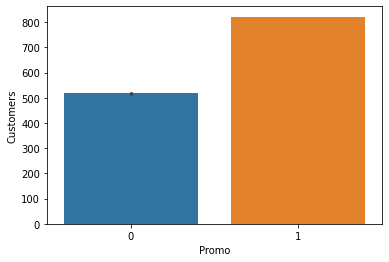

In [29]:
sns.barplot(x=ross_df['Promo'],y=ross_df['Customers'])

**Inference:**
It shows significant increase in customers on promotion stores, so Customers and promotion have positive correlation 

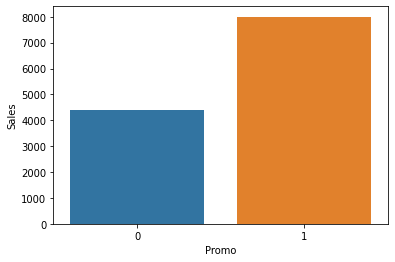

In [30]:
sns.barplot(x=ross_df['Promo'],y=ross_df['Sales'])

**Inference:**
It shows significant increase in Sales also on promotion stores, so Sales and promotion also have positive correlation 

**Store open or closed based Analysis**

0 means closed
1 means opened


Text(0.5, 1.0, "store's open status in relation to day of the week")

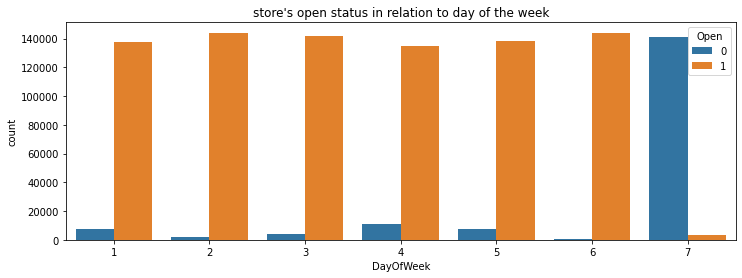

In [31]:
#let's explore store open in relation to day of week
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for Days of week Vs Store open
sns.countplot(x='DayOfWeek',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to day of the week")

**Inference:**

It clearly shows the store are open 6 days a week, and majority of stores are closed on Sundays


Text(0.5, 1.0, "store's open status in relation to State Holiday")

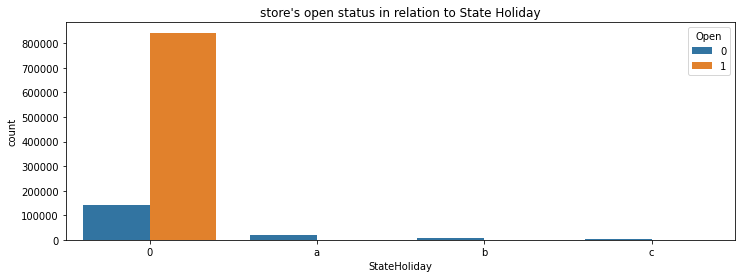

In [32]:
#let's explore open in relation to State Holiday
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for State Holiday Vs Store open
sns.countplot(x='StateHoliday',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to State Holiday")

0 means no holiday
It shows nearly all shops are closed during state holidays 

Text(0.5, 1.0, "store's open status in relation to School holiday")

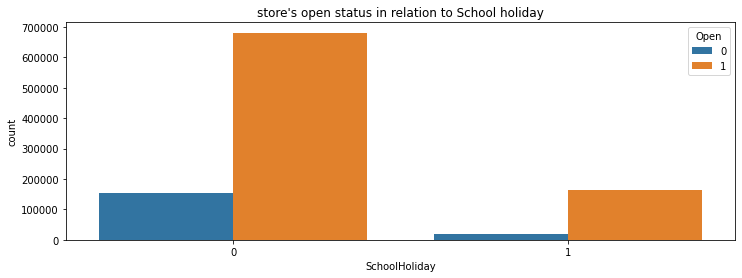

In [33]:
#let's explore open in relation to SchoolHoliday
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for School Holiday Vs Store open
sns.countplot(x='SchoolHoliday',hue='Open', data=ross_df, ax=axis1)
plt.title("store's open status in relation to School holiday")

It shows some of shops open during school holidays

**Sales Analysis**

Text(0.5, 1.0, "store's sales in relation to Open")

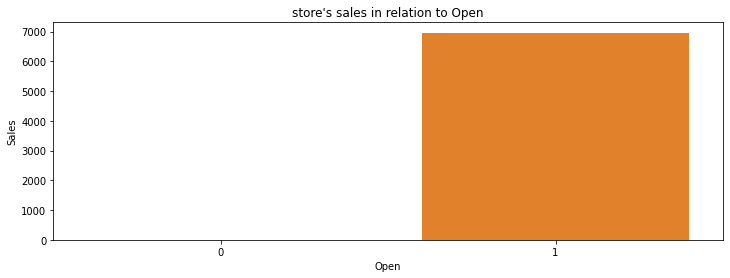

In [34]:
#let's explore open in relation to Sales
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for Open Vs Sales
sns.barplot(y='Sales',x='Open', data=ross_df, ax=axis1)
plt.title("store's sales in relation to Open")

**Inference**


It clearly shows that there is no sales in closed stores, so we can consider only open for our training analysis
and validating it with closed stores also

Text(0.5, 1.0, "store's sales in relation to StateHoliday")

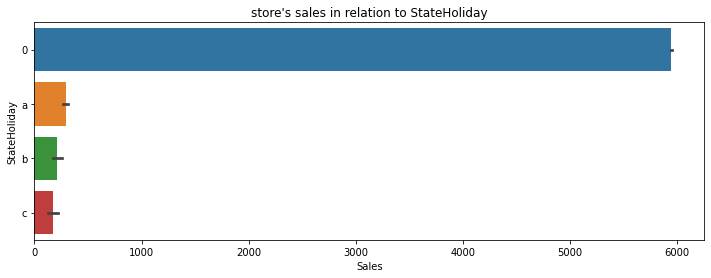

In [35]:
#let's explore state Holiday in relation to Sales
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for State  Holiday Vs Sales
sns.barplot(y='StateHoliday',x='Sales', data=ross_df, ax=axis1)
plt.title("store's sales in relation to StateHoliday")

Inference:


Sales are very less to state holidays, because majority of stores are closed

Text(0.5, 1.0, "store's sales in relation to SchoolHoliday")

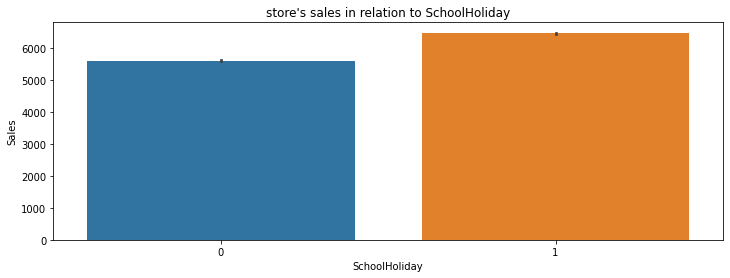

In [36]:
#let's explore School Holiday in relation to Sales
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot count plot for School  Holiday Vs Sales
sns.barplot(y='Sales',x='SchoolHoliday', data=ross_df, ax=axis1)
plt.title("store's sales in relation to SchoolHoliday")

It clears shows that Sales are High during School Holidays, even higher that normal days. It shows peoples are go with their children to shopping during School Holidays

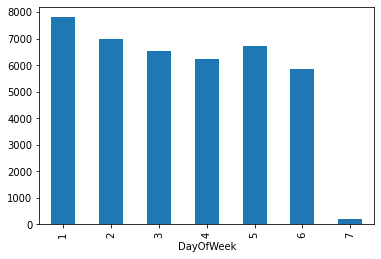

In [37]:
# plot of sales avergae based on day of week
ross_df.groupby('DayOfWeek').Sales.mean().plot(kind='bar')

It shows the mean sales are very High during monday and Sunday there is no Sales, because sunday majority of stores are closed, so peoples may buy their product in Monday

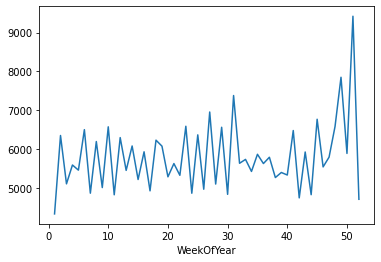

In [38]:
# Average sales on week of the year
ross_df.groupby('WeekOfYear').Sales.mean().plot(kind='line')

It clearly shows  that Christmas and New Year time (see graph at weeks near 52) lead to increase in sales. 

As Rossmann Stores sells health and beauty products, we can assume that during Christmas and New Year people buy beauty products and gifts because of party, celebrations and, this might the cause of sudden increase in sales.

**Competition Distance and Competition since year analysis**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of competition distance')

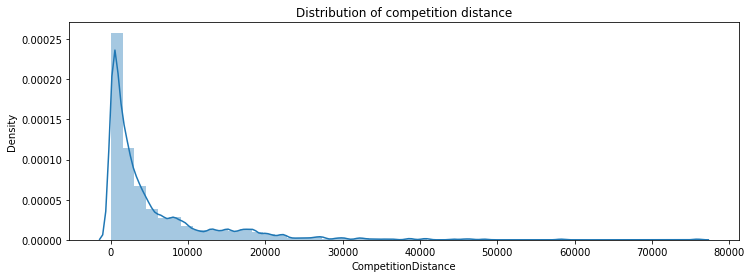

In [39]:
#let's explore competition distance
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot hist plot for CompetitionDistance

sns.distplot(ross_df['CompetitionDistance'])
plt.title("Distribution of competition distance")

It  clearly shows that most of the stores have their competition store within 5km range.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of competition open since year')

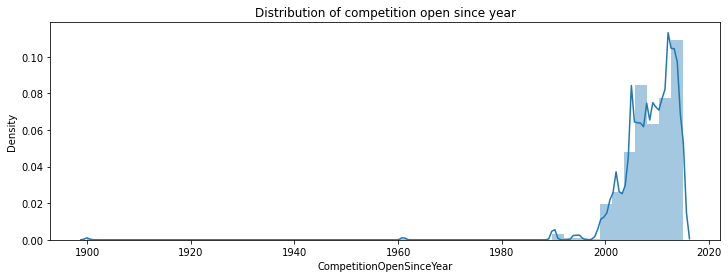

In [40]:
#let's explore competitionopen since year
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
# plot hist plot for Competition ope since year
sns.distplot(ross_df['CompetitionOpenSinceYear'])
plt.title("Distribution of competition open since year")

Majority of the stores have their competition opened after year 2000.

# **Machine Learning**
## **Supervised Machine Learning**

**Feature engineering**

From EDA of Open sales analysis, we knows that sales is zero when store is closed, so we are considering only open stores in training data. To make the training faster and efficient

In [41]:
training_df=ross_df[ross_df['Open']==1].copy()

**Input(Independent variable) and Output columns (Dependent variables)**

In [42]:
training_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [43]:
# y is dependent variable (output)
y=training_df['Sales'].copy()
# x is training variable
x=training_df.copy()
del x['Sales'],x['PromoInterval'],x['Date']

**Scale numeric columns**

In [44]:
#convert days of week to category
x['DayOfWeek']=x['DayOfWeek'].astype('str')

In [45]:
# delete unnecessary columns not needed for analysis
del x['CompetitionOpenSinceMonth'],x['CompetitionOpenSinceYear'],x['Promo2SinceWeek'],x['Promo2SinceYear']

In [46]:
# create numeric columns list
num_col=x.select_dtypes(include=np.number).columns.tolist()

In [47]:
# import minmax scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [48]:
#Let's scale numeric values to the 0 to 1 range.
scaler = MinMaxScaler().fit(x[num_col])
x[num_col]= scaler.transform(x[num_col])
training_df[num_col]=scaler.transform(training_df[num_col])

In [49]:
# checking the values are scaled or not
x

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen,Promo2Open,IsPromo2Month
0,0.000000,5,0.075122,0.0,1.0,0,1.0,1.0,0.545455,1.0,0.588235,c,a,0.016482,0.0,0.059163,0.000000,0.0
1,0.000898,5,0.084597,0.0,1.0,0,1.0,1.0,0.545455,1.0,0.588235,a,a,0.007252,1.0,0.066378,0.890710,0.0
2,0.001795,5,0.111126,0.0,1.0,0,1.0,1.0,0.545455,1.0,0.588235,a,a,0.186050,1.0,0.074315,0.720856,0.0
3,0.002693,5,0.202761,0.0,1.0,0,1.0,1.0,0.545455,1.0,0.588235,c,c,0.007911,0.0,0.050505,0.000000,0.0
4,0.003591,5,0.075663,0.0,1.0,0,1.0,1.0,0.545455,1.0,0.588235,a,a,0.394119,0.0,0.002165,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,2,0.076611,0.0,0.0,a,1.0,0.0,0.000000,0.0,0.000000,b,a,0.001714,0.0,0.054834,0.000000,0.0
1016827,0.657092,2,0.321738,0.0,0.0,a,1.0,0.0,0.000000,0.0,0.000000,b,b,0.011076,0.0,0.114719,0.000000,0.0
1016863,0.689408,2,0.168923,0.0,0.0,a,1.0,0.0,0.000000,0.0,0.000000,b,b,0.010812,1.0,0.000000,0.016849,0.0
1017042,0.850090,2,0.140633,0.0,0.0,a,1.0,0.0,0.000000,0.0,0.000000,b,b,0.018592,0.0,0.000000,0.000000,0.0


Getting relationship of all the columns in dataset to sales

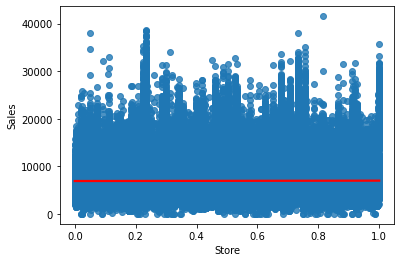

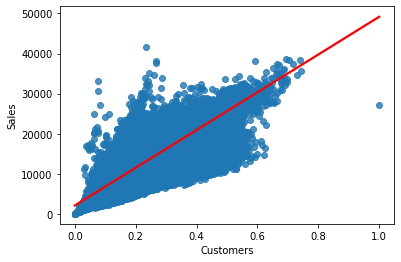

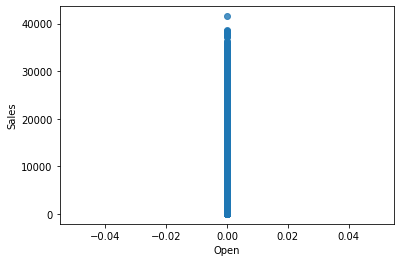

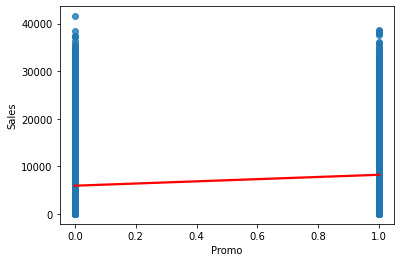

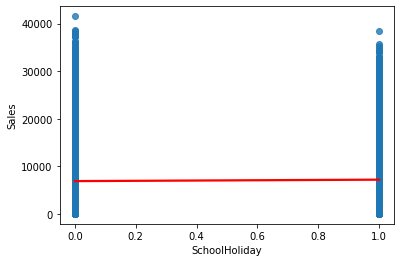

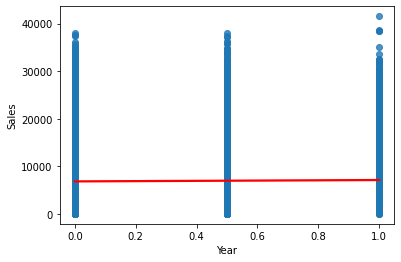

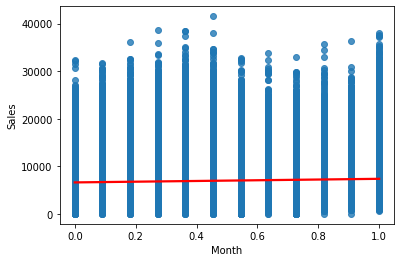

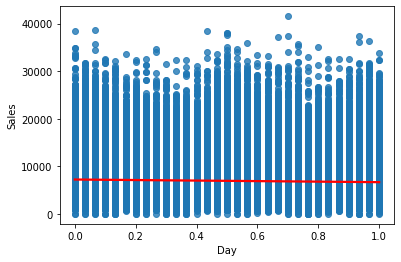

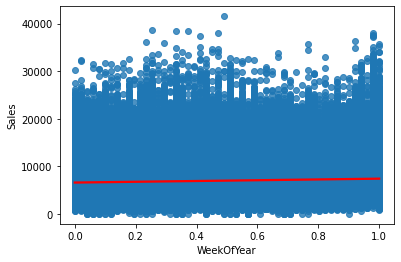

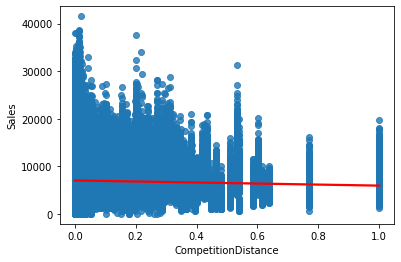

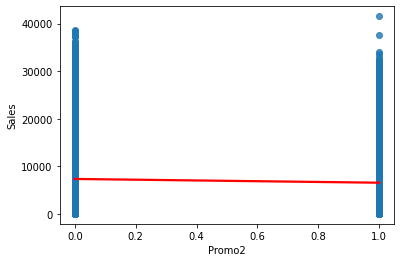

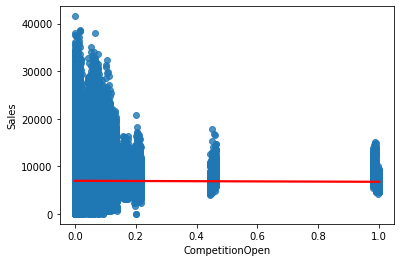

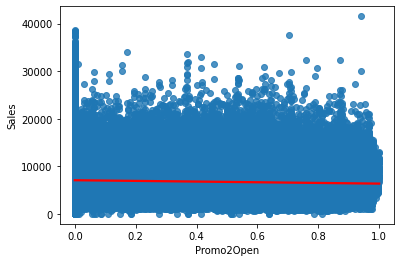

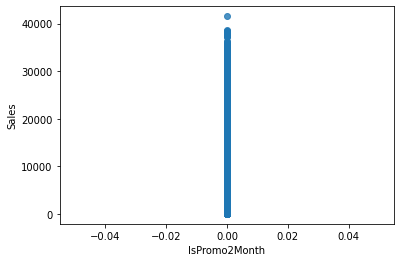

In [50]:
#ploting Regression plot of each numeric columns of dataset v/s Sales

for col in num_col:
  sns.regplot(x=x[col],y=y,line_kws={"color": "red"})
  plt.show()

**Inference:**
sales and customer have linear **positive** correlation 

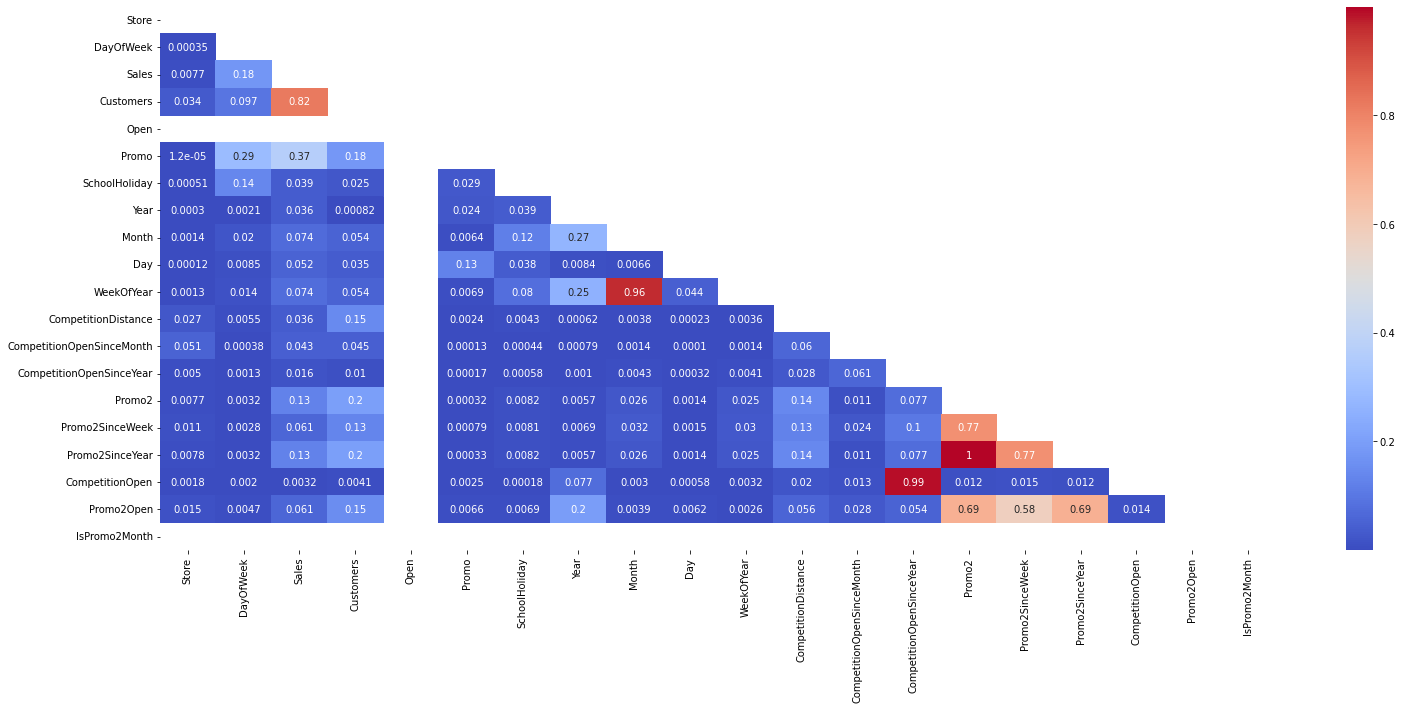

In [51]:
# plot correlation between various plots
plt.figure(figsize=(25,10))
cor=training_df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')


**Inference:**
we found sales and customer have linear **positive** correlation of 0.82

**Encode Categorical Columns**

In [52]:
# create categorical columns list
cat_col=x.select_dtypes(include=object).columns.tolist()

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
#encoding categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(x[cat_col])
encoded_cols = list(encoder.get_feature_names(cat_col))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
# transform enoced column
x[encoded_cols] = encoder.transform(x[cat_col])

In [56]:
#remove unnecessary  categorical column
for i in cat_col:
  del x[i]


# **Model Selection**

In [57]:
#importing libariries for models
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [58]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [59]:
# making a function to train and evaluate linear model
def train_run_model (model,X_train,y_train,X_test,y_test):

  #training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)


  print('\n================Evalution Matrix=========================\n')
  print(model)
  #finding mean_squared_error
  MSE  = mean_squared_error(y_test,pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test,pred)
  print("R2 :" ,r2)
  
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test,pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  

  print('\n================Evalution Matrix=========================\n')
  score=model.score(X_test,Y_test)
  print('Model_Score:'+str(score))

  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
  
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Actual","Predicted"])
  plt.show()

In [60]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [61]:
from sklearn.model_selection import train_test_split
# splitting the model 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)

In [62]:
X_train

,Store,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
485903,0.491921,0.077829,0.0,0.0,0.0,0.5,0.272727,0.700000,0.313725,0.030459,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
164400,0.444345,0.122225,0.0,1.0,0.0,1.0,0.181818,0.166667,0.176471,0.036392,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
689456,0.050269,0.197076,0.0,1.0,1.0,0.0,0.818182,0.666667,0.823529,0.005274,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
441908,0.034111,0.064700,0.0,0.0,0.0,0.5,0.363636,1.000000,0.411765,0.003165,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
829637,0.773788,0.166757,0.0,1.0,0.0,0.0,0.454545,0.566667,0.470588,0.281514,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591433,0.137343,0.087710,0.0,0.0,0.0,0.5,0.000000,0.533333,0.039216,0.216245,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
954217,0.504488,0.090688,0.0,0.0,0.0,0.0,0.090909,0.833333,0.156863,0.008966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
567747,0.894973,0.069978,0.0,0.0,0.0,0.5,0.090909,0.233333,0.098039,0.010021,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
591926,0.579892,0.090282,0.0,0.0,0.0,0.5,0.000000,0.533333,0.039216,0.097574,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 16 kB/s 


In [64]:
#Importing various Machine learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [65]:
#storing various models
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('XG',XGBRegressor(random_state=42, n_jobs=-1)))
models.append(('CAT',CatBoostRegressor()))
models.append(('LGB',LGBMRegressor()))


================Evalution Matrix=========================

LinearRegression()
MSE : 1624976.4744817296
RMSE : 1274.7456508973582
R2 : 0.8321588154999416
Adjusted R2 :  0.8321270059343967

================Evalution Matrix=========================

Model_Score:0.8321588154999416
  =========================================================  Evalution Graph  ===================================================



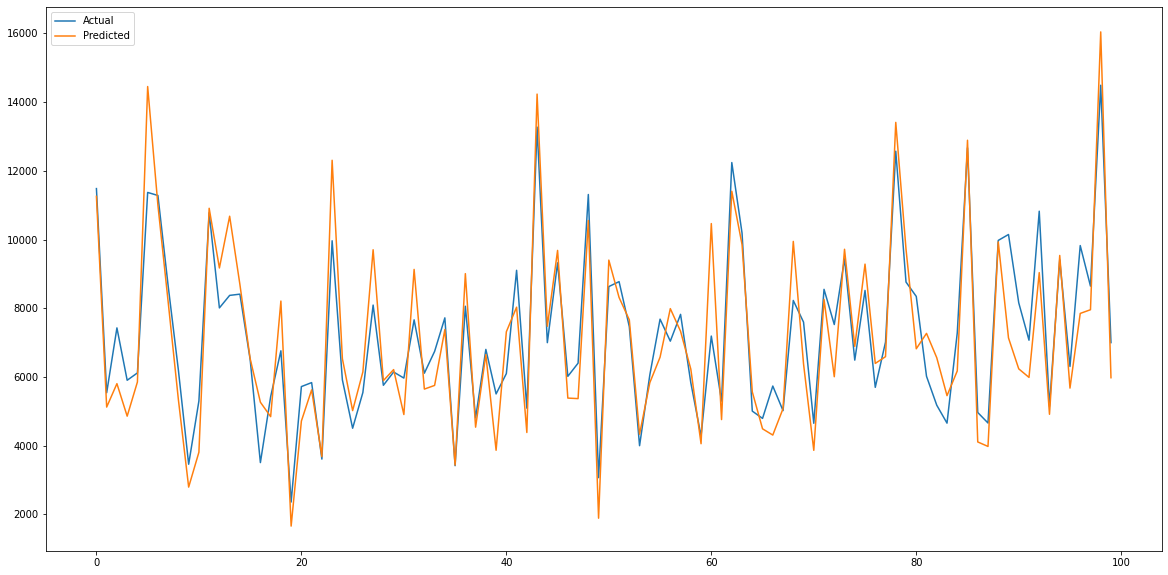


================Evalution Matrix=========================

DecisionTreeRegressor()
MSE : 503084.48678047594
RMSE : 709.2844893133332
R2 : 0.9480372193131167
Adjusted R2 :  0.9480273712327241

================Evalution Matrix=========================

Model_Score:0.9480372193131167
  =========================================================  Evalution Graph  ===================================================



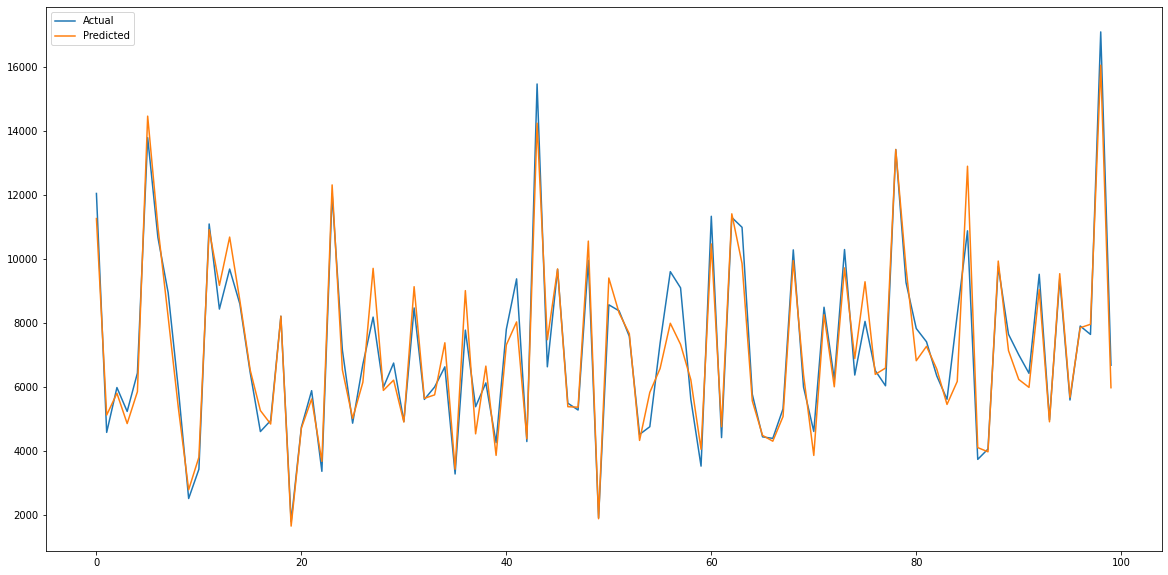


================Evalution Matrix=========================

RandomForestRegressor()
MSE : 240022.7777156355
RMSE : 489.9211954137476
R2 : 0.975208436582668
Adjusted R2 :  0.9752037380406275

================Evalution Matrix=========================

Model_Score:0.975208436582668
  =========================================================  Evalution Graph  ===================================================



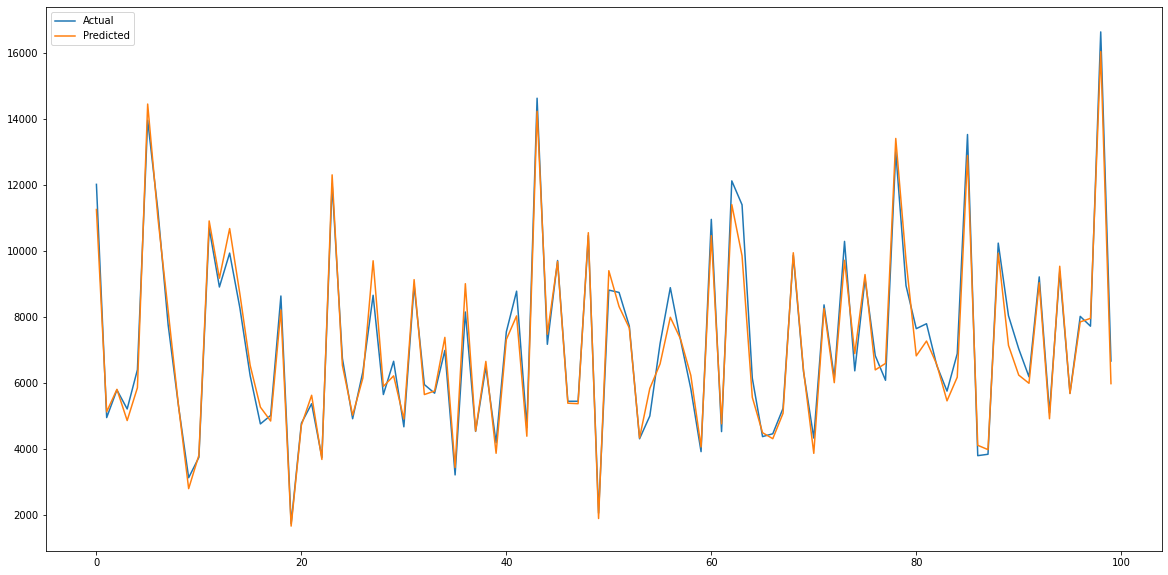


================Evalution Matrix=========================

GradientBoostingRegressor()
MSE : 1074936.2421012474
RMSE : 1036.791320421447
R2 : 0.8889715789923311
Adjusted R2 :  0.8889505366847121

================Evalution Matrix=========================

Model_Score:0.8889715789923311
  =========================================================  Evalution Graph  ===================================================



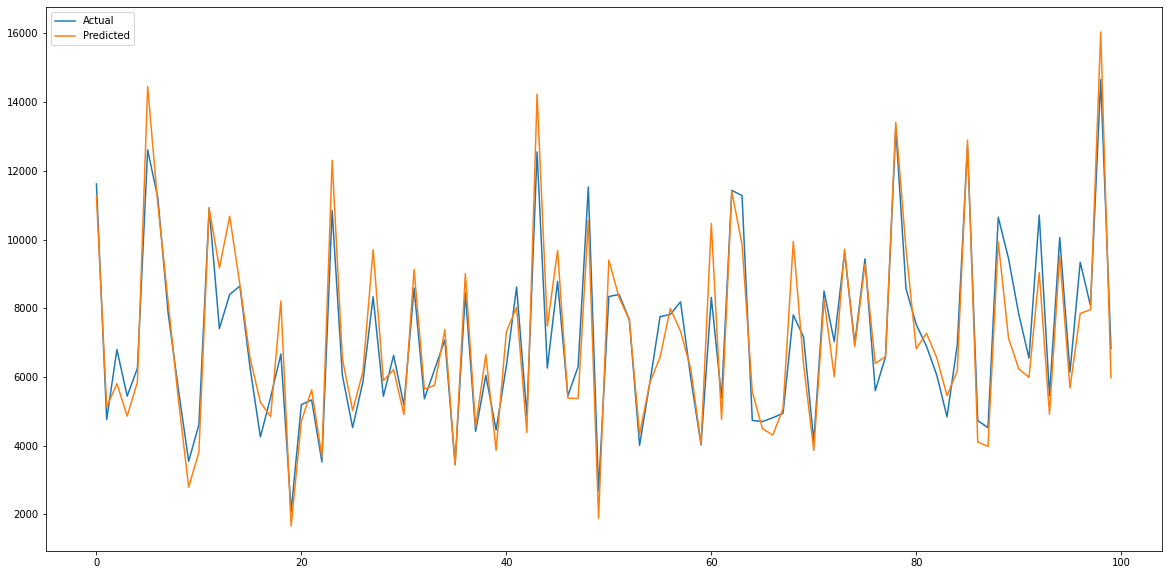

[14:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

================Evalution Matrix=========================

XGBRegressor(n_jobs=-1, random_state=42)
MSE : 1079391.2296622193
RMSE : 1038.9375484899076
R2 : 0.8885114305527022
Adjusted R2 :  0.8884903010369167

================Evalution Matrix=========================

Model_Score:0.8885114305527022
  =========================================================  Evalution Graph  ===================================================



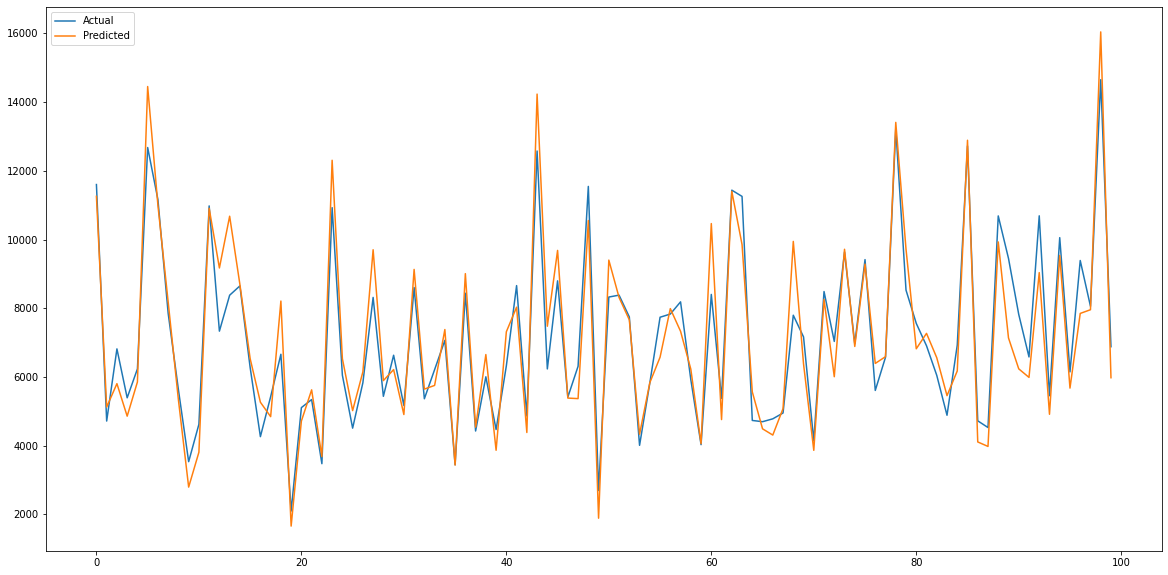

Learning rate set to 0.11462
0:	learn: 2850.5633709	total: 179ms	remaining: 2m 58s
1:	learn: 2629.7532577	total: 284ms	remaining: 2m 21s
2:	learn: 2436.5943783	total: 390ms	remaining: 2m 9s
3:	learn: 2272.4042268	total: 494ms	remaining: 2m 3s
4:	learn: 2122.1633792	total: 587ms	remaining: 1m 56s
5:	learn: 1993.5922678	total: 694ms	remaining: 1m 55s
6:	learn: 1880.0126569	total: 793ms	remaining: 1m 52s
7:	learn: 1786.1027676	total: 911ms	remaining: 1m 52s
8:	learn: 1699.7121177	total: 1.01s	remaining: 1m 51s
9:	learn: 1630.1400421	total: 1.12s	remaining: 1m 51s
10:	learn: 1566.7742597	total: 1.23s	remaining: 1m 50s
11:	learn: 1511.1524632	total: 1.32s	remaining: 1m 48s
12:	learn: 1465.1484957	total: 1.42s	remaining: 1m 47s
13:	learn: 1423.2895543	total: 1.52s	remaining: 1m 47s
14:	learn: 1387.3180955	total: 1.62s	remaining: 1m 46s
15:	learn: 1355.5315093	total: 1.73s	remaining: 1m 46s
16:	learn: 1325.5541202	total: 1.82s	remaining: 1m 45s
17:	learn: 1301.4669363	total: 1.92s	remaining: 

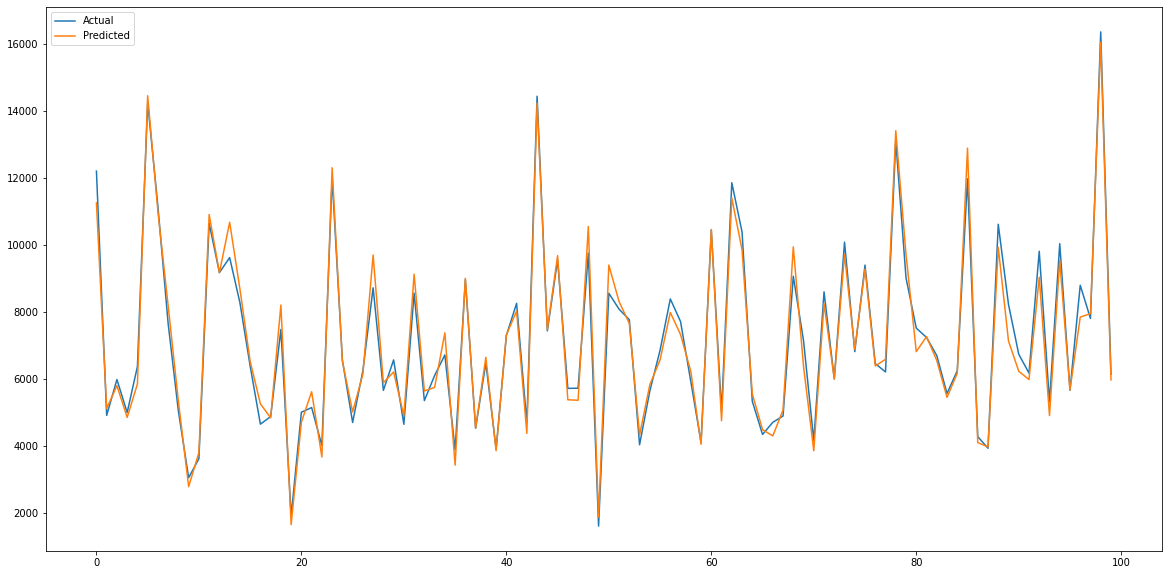


================Evalution Matrix=========================

LGBMRegressor()
MSE : 643130.5088737364
RMSE : 801.9541812807863
R2 : 0.9335720928317311
Adjusted R2 :  0.9335595032943457

================Evalution Matrix=========================

Model_Score:0.9335720928317311
  =========================================================  Evalution Graph  ===================================================



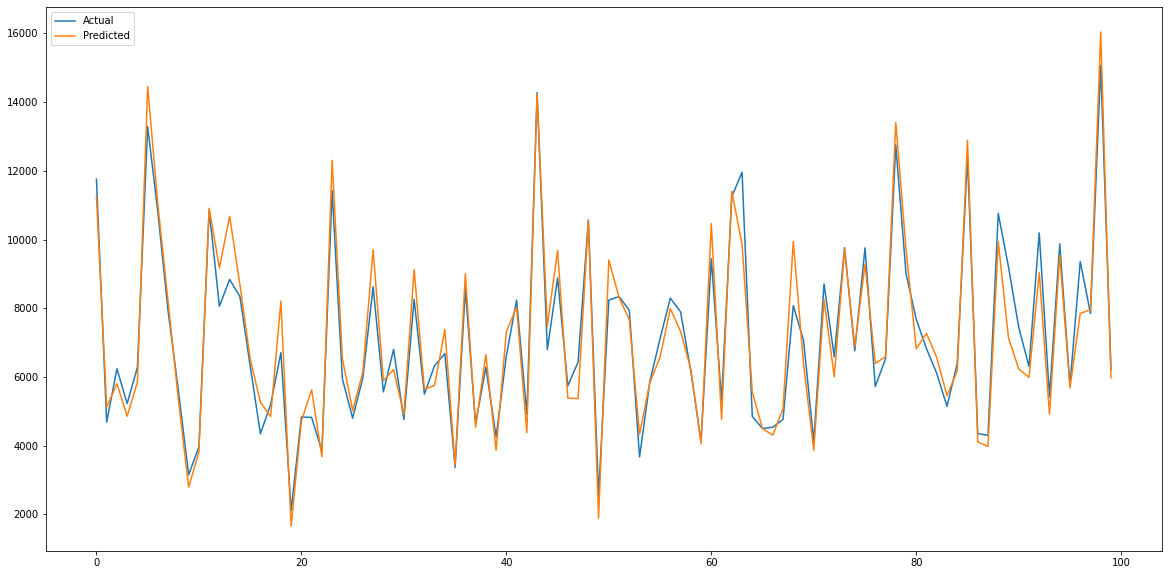

In [66]:
# training various model and choosing the good model
for name, model in models:
    train_run_model(model,X_train,Y_train,X_test,Y_test)


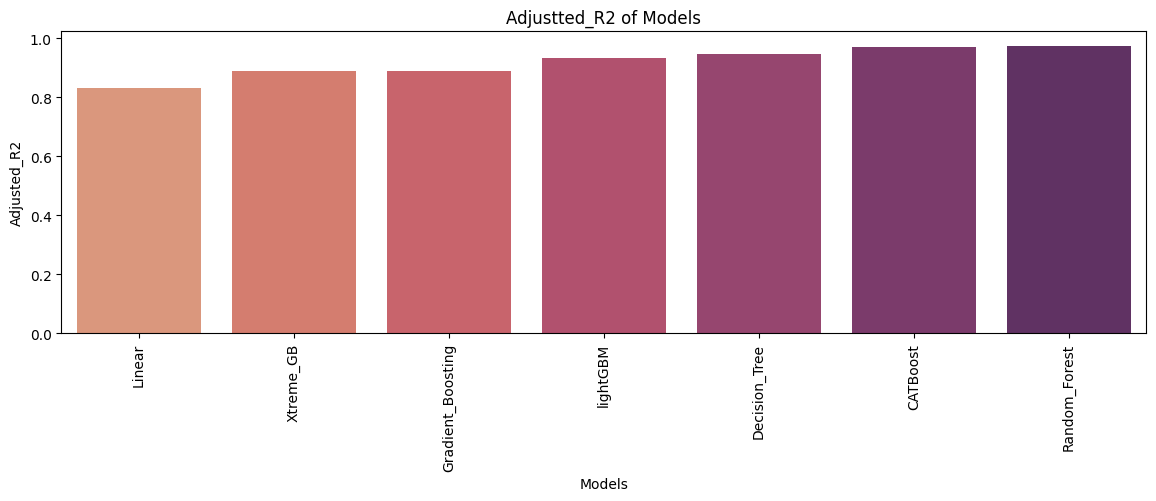

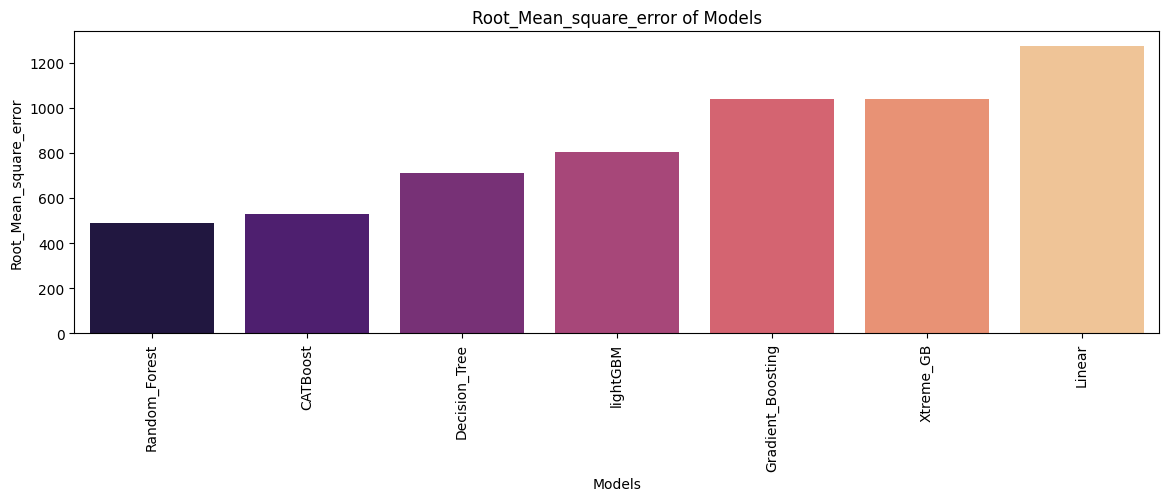

In [67]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']


#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})
final_matrices
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Root_Mean_square_error',data=final_matrices.sort_values('Root_Mean_square_error'),palette="magma").set(title='Root_Mean_square_error of Models')
plt.xticks(rotation=90);

In [68]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,1.624976e+06,1274.745651,0.832159,0.832127
1,Decision_Tree,5.030845e+05,709.284489,0.948037,0.948027
2,Random_Forest,2.400228e+05,489.921195,0.975208,0.975204
3,Gradient_Boosting,1.074936e+06,1036.791320,0.888972,0.888951
4,Xtreme_GB,1.079391e+06,1038.937548,0.888511,0.888490
5,CATBoost,2.779187e+05,527.179956,0.971294,0.971289
6,lightGBM,6.431305e+05,801.954181,0.933572,0.933560


# Hyper Parameter tuning

**N-estimators:**
The number of trees to be created. More trees = greater capacity of the model.


**max_depth**
As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [69]:
grid_dict={}
#creating param dict to check random forest with diffirent value of parameter through gridsearch
grid_dict['RFparams'] = {'n_estimators':[60,80,100],'max_depth':[15,20] ,'max_leaf_nodes':[40,60,80]}
#creating param dict for gridsearch Xgboost
grid_dict['XGparams'] = {'n_estimators':[80,100,150],'max_depth':[15,20,30] }
# finding the best parameters for XGBRegressor by gridsearchcv
grid_dict['LGBparams']={'n_estimators': [150,200,250],'max_depth': [7,10,13]}

In [69]:
from sklearn.metrics import mean_squared_error
#udf for rmse calculation
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
# user defined function for tuning the parameters by getting RMSE value
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, Y_train)
    train_rmse = rmse(model.predict(X_train),Y_train )
    test_rmse = rmse(model.predict(X_test), Y_test)
    print('Train RMSE: {}, Test RMSE: {}'.format(train_rmse, test_rmse))


In [ ]:
new_models=[]

new_models.append(('RF', RandomForestRegressor()))
new_models.append(('XG',XGBRegressor(random_state=42, n_jobs=-1)))
new_models.append(('LGB',LGBMRegressor()))

# Feature Importance
for name,model  in new_models:
    params_name=name+'params'
    params=grid_dict[params_name]
    #creating grid model to run rf model with gridsearch
    grid= GridSearchCV(model,param_grid=params,verbose=0)
    train_run_model(grid,X_train,Y_train,X_test,Y_test)
    # optimal_gb_model=grid.best_estimator_
    # #get_features_importance(optimal_gb_model,X_train)
    # feature_importances = pd.DataFrame(model.feature_importances_,
    #                                   index = X_train.columns,
    #                                     columns=['importance']).sort_values('importance',
    #                                                                         ascending=False)
                                        
    # plt.subplots(figsize=(17,6))
    # plt.title(f"{name}- Feature importances")
    # plt.bar(feature_importances.index, feature_importances['importance'],
    #         color="r",  align="center")
    # plt.xticks(feature_importances.index, rotation = 85)
    # plt.show()